In [3]:
#First step is to import the Libraries we will need to use 
import pandas as pd
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set()
np.random.seed(42)
plt.rcParams['figure.figsize']=[15,5]


UsageError: Line magic function `%` not found.


In [4]:
df=pd.read_csv(r'C:\Users\IOZEIR\Desktop\crude.csv',parse_dates=['Date'])

In [5]:
df=df.sort_values('Date')
df=df.set_index('Date')
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1983-03-30,28.90,28.95,28.70,28.95,NaN,28.95,18.0,14.0
1983-03-31,28.75,28.75,28.75,28.75,NaN,28.75,3.0,13.0
1983-04-04,28.95,28.95,28.95,28.95,NaN,28.95,0.0,13.0
1983-04-05,29.00,29.10,29.00,29.10,NaN,29.10,5.0,18.0
1983-04-06,29.10,29.20,29.10,29.20,NaN,29.20,5.0,19.0


In [6]:
df=df.fillna(method='ffill')
df=df.drop(['Change'],axis=1)
df['shifted']=df.Settle.shift()
df['Change']=df['Settle']-df['shifted']
df.tail()



,Open,High,Low,Last,Settle,Volume,Previous Day Open Interest,shifted,Change
Date,,,,,,,,,
2019-12-16,52.87,54.03,53.82,54.03,54.51,2431.0,9140.0,54.27,0.24
2019-12-17,52.87,54.03,53.82,54.03,54.62,685.0,9862.0,54.51,0.11
2019-12-18,52.87,54.03,53.82,54.03,54.59,587.0,10125.0,54.62,-0.03
2019-12-19,52.87,54.03,53.82,54.03,54.59,676.0,10194.0,54.59,0.00
2019-12-20,52.87,54.03,53.82,54.03,54.51,262.0,10606.0,54.59,-0.08


In [11]:
df_cad=pd.read_csv(r'C:\Users\IOZEIR\Desktop\CAD.csv',parse_dates=['Date'])                   

In [12]:
df_cad=df_cad.sort_values('Date')
df_cad=df_cad.set_index('Date')
df_cad.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1977-03-11,0.93,0.931,0.93,0.93,NaN,0.93,1,1
1977-03-14,0.93,0.930,0.93,0.93,NaN,0.93,0,1
1977-03-15,0.93,0.930,0.93,0.93,NaN,0.93,0,1
1977-03-16,0.93,0.930,0.93,0.93,NaN,0.93,0,1
1977-03-17,0.93,0.930,0.93,0.93,NaN,0.93,0,1


In [13]:
df_cad=df_cad.fillna(method='ffill')
df_cad=df_cad.drop(['Change'],axis=1)
#df['shifted']=df.Settle.shift()
#df['Change']=df['Settle']-df['shifted']
df.tail()

,Open,High,Low,Last,Settle,Volume,Previous Day Open Interest,shifted,Change
Date,,,,,,,,,
2019-08-27,51.12,51.48,50.84,51.48,51.54,233,12067,50.62,0.92
2019-08-28,51.12,51.91,50.84,51.91,51.97,320,12143,51.54,0.43
2019-08-29,51.12,51.91,50.84,51.91,52.20,314,12160,51.97,0.23
2019-08-30,51.12,51.91,51.10,51.10,50.93,651,12199,52.20,-1.27
2019-09-03,51.12,51.91,50.25,50.25,50.46,256,12357,50.93,-0.47


In [14]:
df.rename(columns={'Settle':'crude price'},inplace=True)
df_cad.rename(columns={'Settle':'Cad price'},inplace=True)

In [15]:
df_cont=pd.concat([df['crude price'],df_cad['Cad price']],axis=1)
df_cont.dropna().head()

,crude price,Cad price
Date,,
1983-04-07,29.45,0.8087
1983-04-08,29.90,0.8093
1983-04-11,29.80,0.8095
1983-04-12,30.40,0.8103
1983-04-13,30.45,0.8103


In [16]:
df_cont.tail()

,crude price,Cad price
Date,,
2019-08-27,51.54,0.75425
2019-08-28,51.97,0.75315
2019-08-29,52.20,0.75365
2019-08-30,50.93,0.75240
2019-09-03,50.46,0.75200


In [17]:
df_cont=df_cont.dropna()

In [18]:
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9050 entries, 1983-04-07 to 2019-09-03
Data columns (total 2 columns):
crude price    9050 non-null float64
Cad price      9050 non-null float64
dtypes: float64(2)
memory usage: 212.1 KB


C:\Users\IOZEIR\AppData\Roaming\AnacondaPython\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


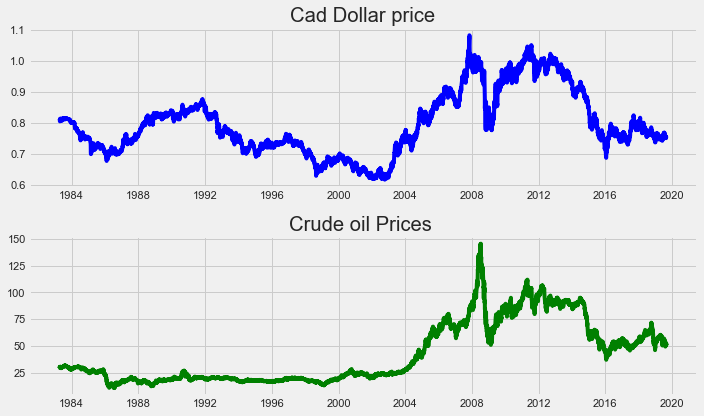

In [19]:
sns.set(rc={"figure.figsize": (10, 6)})
plt.style.use('fivethirtyeight')
plt.subplot(2,1,1)
plt.title('Cad Dollar price')
plt.plot(df_cont['Cad price'],color='blue')
plt.subplot(2,1,2)
plt.title('Crude oil Prices ')
plt.plot(df_cont['crude price'],color='green')
plt.tight_layout()
plt.show()

In [20]:
## Spliting the data to train and test data
df_train=df_cont.loc['2000':'2016']
df_test=df_cont.loc['2017':]


In [21]:
##df_crude=df_cont.drop(['Cad price'],axis=1).loc['2016':'01-01-2017']
df_crude=df_cont.drop((['Cad price']),axis=1)
df_crude_train=df_train.drop(['Cad price'],axis=1)
df_crude_test=df_test.drop(['Cad price'],axis=1)
df_crude=df_cont.drop(['Cad price'],axis=1).loc['2016':'01-01-2017']

In [22]:
df_crude_test.head()

,crude price
Date,
2017-01-03,55.69
2017-01-04,56.74
2017-01-05,57.19
2017-01-06,57.46
2017-01-09,56.11


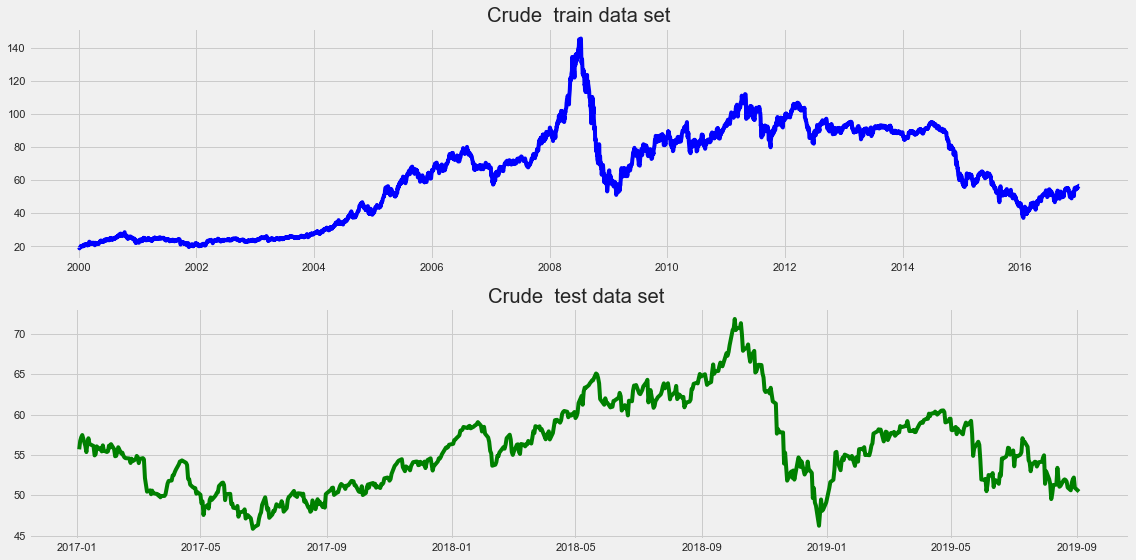

In [23]:
sns.set(rc={"figure.figsize": (16, 8)})
plt.style.use('fivethirtyeight')
plt.subplot(2,1,1)
plt.title('Crude  train data set')
plt.plot(df_crude_train,color='blue')
plt.subplot(2,1,2)
plt.title('Crude  test data set ')
plt.plot(df_crude_test,color='green')
plt.tight_layout()
plt.show()

__The first test before the  modeling is  to check whether the time series is stationary or not in case it is not stationary we have to change it to stationary series .one way is the Adfuller test where the following test shows that the time series is not stationary and we should  convert it where the p-value is 0.6 > a 0.05 to reject the null hypothesis.__

In [24]:
adf = adfuller(df_crude['crude price'])
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
        print('\t{}: {}'.format(key, value))


ADF Statistic: -1.341094619093851
p-value: 0.6101681841234144
Critical Values:
	1%: -3.4569962781990573
	5%: -2.8732659015936024
	10%: -2.573018897632674


__Testing for the seasonality of the DATA__

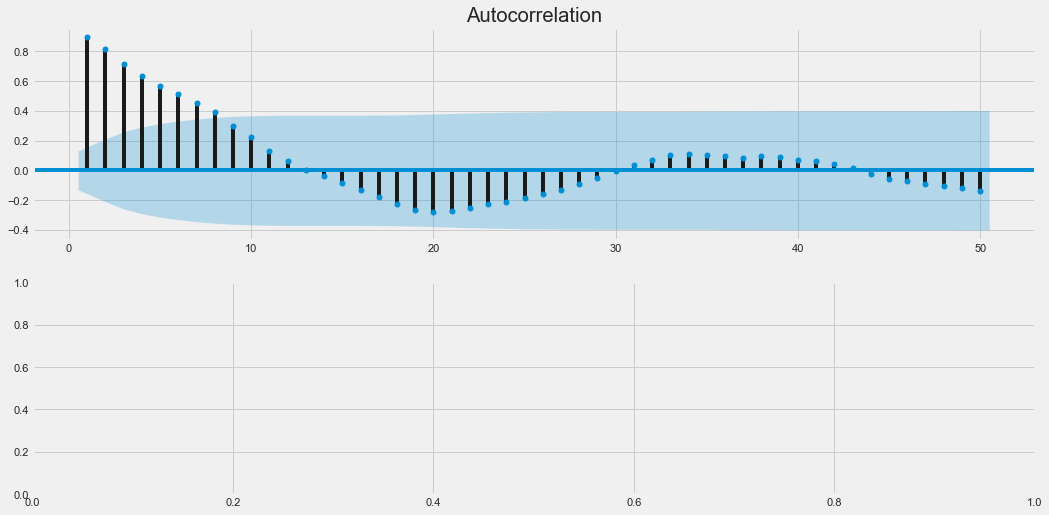

In [46]:
# ploting the ACF  for Crude oil Detrended data
bf=df_crude-df_crude.rolling(30).mean()
bf=bf.dropna()
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(16,8))
plot_acf(bf,lags=50,zero=False ,ax=ax1)
plt.show()

__The above ACF shows and proves that the data has no seasonality__

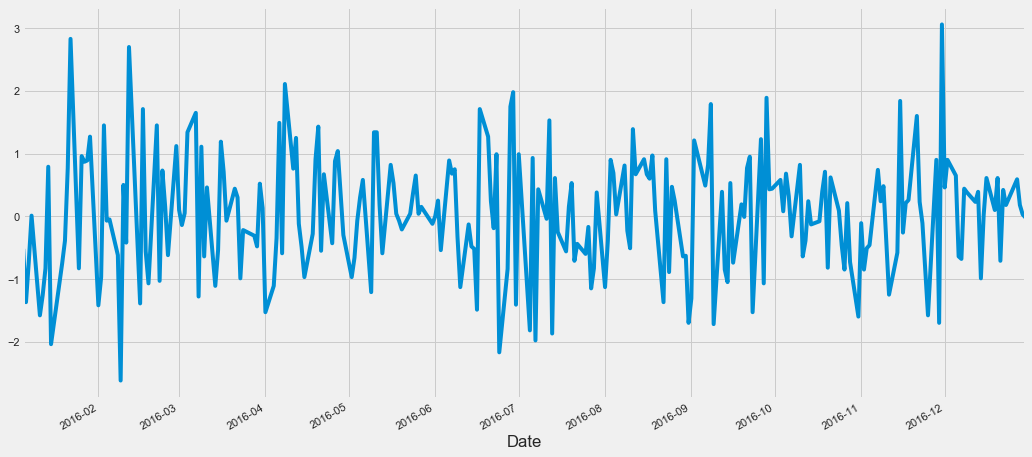

In [47]:
df_diff=df_crude['crude price'].diff().dropna()
df_diff.plot()

In [48]:
# printing the adfuller of the df_diff
result = adfuller(df_diff)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

ADF Statistic: -8.640567162857405
p-value: 5.4403707204535965e-14
Critical Values:
	1%: -3.457105309726321
	5%: -2.873313676101283
	10%: -2.5730443824681606


__The above plot for the data and the adfuller test shows that the data now is stationary after applying the first difference__

Plotting the ACF and PACF would be directional to select the value of the order p and q for the ARIMA model 

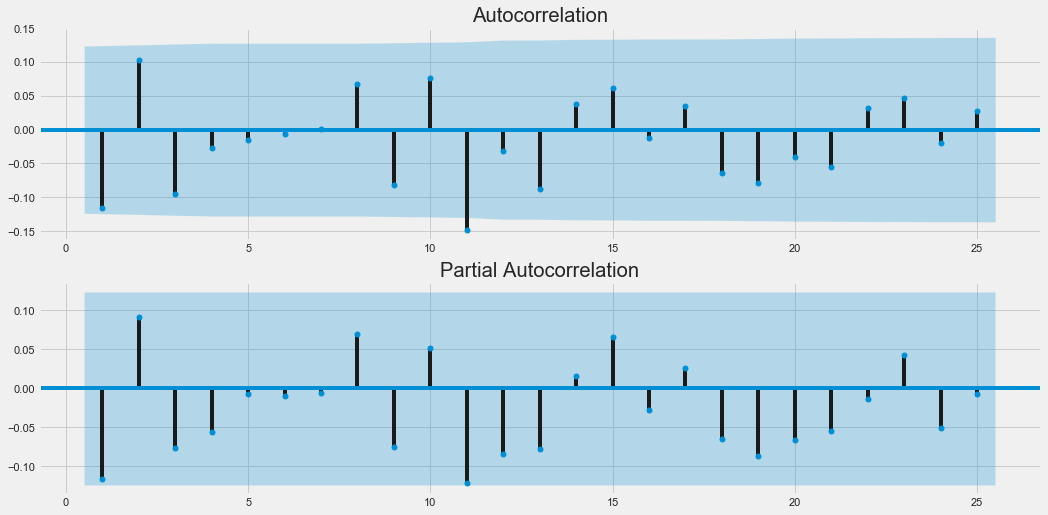

In [28]:
# ploting the ACF and PCF for Crude oil 
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(16,8))
plot_acf(df_diff,lags=25,zero=False ,ax=ax1)
plot_pacf(df_diff,lags=25,zero=False,ax=ax2)
plt.show()


# Looping over a range of values for p and q to choose the best fitting Model 


In [49]:
order_aic_bic=[]
for p in range(4):
    for q in range (4):
        # fit the model
        model=SARIMAX(df_crude_train,order=(p,1,q),trend='c')
        results= model.fit()
        order_aic_bic.append((p,q,results.aic,results.bic))
        

C:\Users\IOZEIR\AppData\Roaming\AnacondaPython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\IOZEIR\AppData\Roaming\AnacondaPython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\IOZEIR\AppData\Roaming\AnacondaPython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\IOZEIR\AppData\Roaming\AnacondaPython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: 

In [50]:
order_df=pd.DataFrame(order_aic_bic,columns=['p','q','AIC','BIC'])
order_df.sort_values('AIC').head()

,p,q,AIC,BIC
15,3,3,12798.275994,12849.069977
11,2,3,12803.860288,12848.305023
14,3,2,12803.881509,12848.326243
5,1,1,12808.339248,12833.736239
13,3,1,12808.344614,12846.440100


In [38]:
# since the Lowest AIC corresponds to p of 3 and q of 3 and  first level difference 
model=SARIMAX(df_crude_train,order=(3,1,3))
result= model.fit()
print(result.summary())



C:\Users\IOZEIR\AppData\Roaming\AnacondaPython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:            crude price   No. Observations:                 4228
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -6390.561
Date:                Mon, 04 Nov 2019   AIC                          12795.123
Time:                        08:40:56   BIC                          12839.567
Sample:                             0   HQIC                         12810.833
                               - 4228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8484      0.040    -21.222      0.000      -0.927      -0.770
ar.L2         -0.9320      0.015    -62.491      0.000      -0.961      -0.903
ar.L3         -0.8483      0.038    -22.361      0.0

C:\Users\IOZEIR\AppData\Roaming\AnacondaPython\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


__Plotting  the Residual of the model__

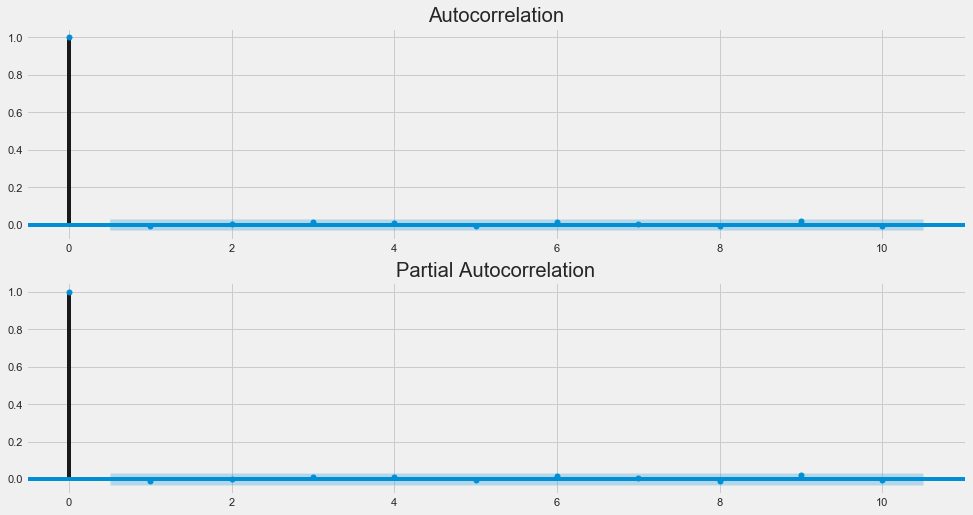

In [39]:
import statsmodels.api as sm
res = result.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=10, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=10, ax=ax[1])
plt.show()



__The above plot of the residuals shows that there is no correlation between the residuals which means that the model did not miss any aspect of trend or seasonality__

__Also a  validation step would be applying or calling the plot_diagnostic on the fitted model which shows a validated model based on the normal distribution of the data__

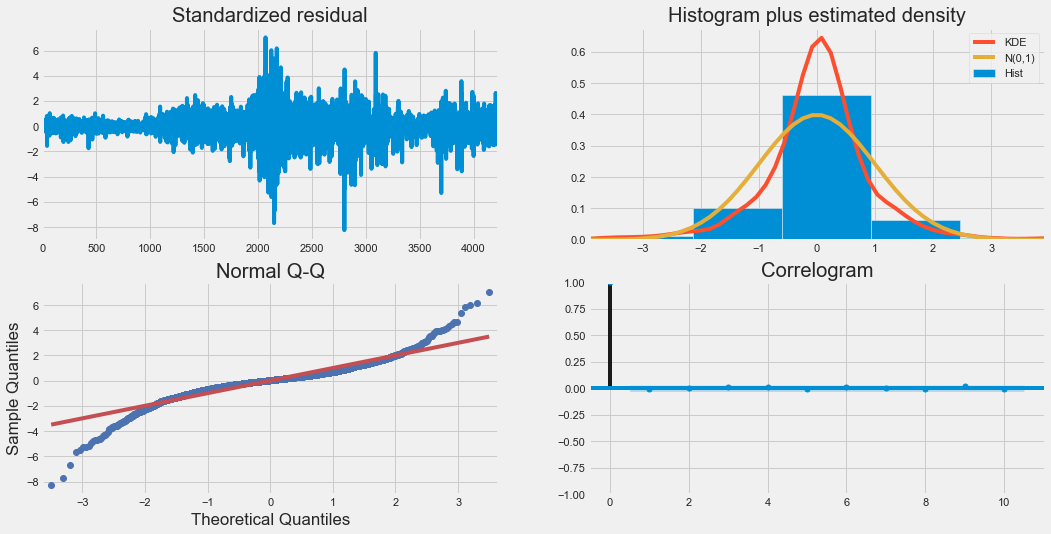

In [40]:
result.plot_diagnostics()
plt.show()

__The diagnostic test states that the model is a good fit for the data where the residuals are normally distributed as the Histogram shows as for the Normal Q-Q shows the residuals are normally distributed for the correlogram shows there is no correlation among the residuals__

In [41]:
## let us now forecast in sample
forecast1=result.get_prediction(start=-50)
mean_forecast1=forecast1.predicted_mean
confidence_intervals= forecast1.conf_int()
lower_limits1= confidence_intervals.loc[:,'lower crude price']
upper_limits1= confidence_intervals.loc[:,'upper crude price']

In [42]:
df_crude=df_cont.drop(['Cad price'],axis=1).loc['2016':'01-01-2017']

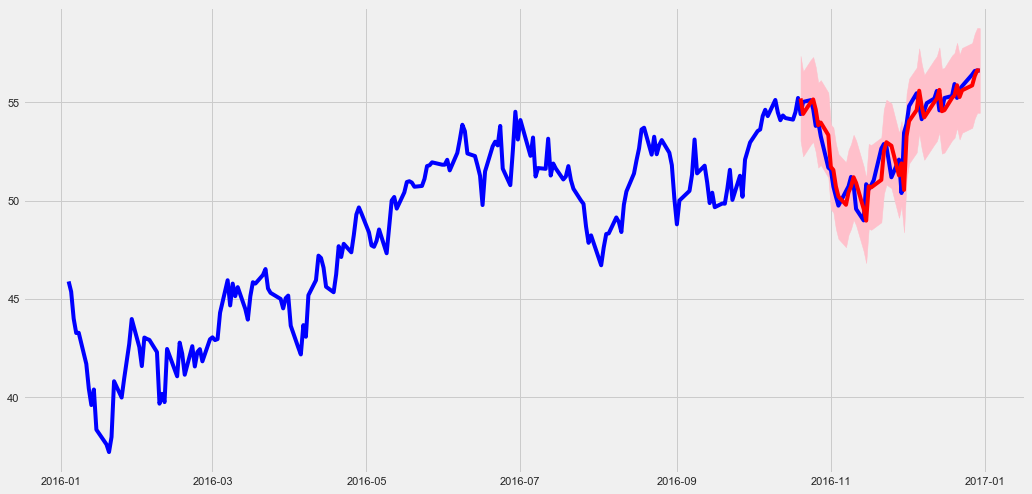

In [43]:
plt.plot(df_crude.index,df_crude,color='blue')
plt.plot(mean_forecast1.index,mean_forecast1,color='red')
plt.fill_between(lower_limits1.index,lower_limits1,upper_limits1,color='pink')
plt.show()

In [44]:
# CALCULATING THE Mean absolute error of the residuals 
residuals =result.resid
mae=np.mean(np.abs(residuals))
mae


0.7259000819075213

In [45]:
## forecasting the future 
import scipy.stats
from sklearn.metrics import mean_squared_error
forecast2=result.get_forecast(steps=10)
mean_forecast2=forecast2.predicted_mean
confidence_intervals= forecast2.conf_int()
lower_limits2 = confidence_intervals.loc[:,'lower crude price']
upper_limits2 = confidence_intervals.loc[:,'upper crude price']


C:\Users\IOZEIR\AppData\Roaming\AnacondaPython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [103]:
print(mean_forecast2)

4228    56.623144
4229    56.568890
4230    56.587315
4231    56.594134
4232    56.617200
4233    56.575647
4234    56.583617
4235    56.596016
4236    56.613317
4237    56.580323
dtype: float64


In [116]:
## forecasting the future 
import scipy.stats
from sklearn.metrics import mean_squared_error
models=SARIMAX(df_crude_test,order=(3,1,3))
results= models.fit()
fcs=results.get_forecast(steps=10)
mean_fc=fcs.predicted_mean
confidence_intervals= fcs.conf_int()
lower_li = confidence_intervals.loc[:,'lower crude price']
upper_li = confidence_intervals.loc[:,'upper crude price']

C:\Users\IOZEIR\AppData\Roaming\AnacondaPython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\IOZEIR\AppData\Roaming\AnacondaPython\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\IOZEIR\AppData\Roaming\AnacondaPython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [109]:
mean_fc = pd.Series(mean_fc ,index=df_crude_test.index)
lower_limi = pd.Series(lower_li, index=df_crude_test.index)
upper_limi = pd.Series(upper_li, index=df_crude_test.index)

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [117]:
mean_fc

672    50.491003
673    50.513372
674    50.498614
675    50.472643
676    50.493207
677    50.513877
678    50.491556
679    50.475071
680    50.498865
681    50.510981
dtype: float64

In [51]:
#plt.plot(df_crude.index,df_crude,color='blue')
plt.plot(mean_fc.index,mean_fc,color='red')
plt.fill_between(lower_limi.index,lower_limi,upper_limi,color='pink')
plt.show()

NameError: name 'mean_fc' is not defined

__As the predection n

In [226]:
# Checkig the ARIMA model 
import scipy.stats
from sklearn.metrics import mean_squared_error
forecaster=result.get_forecast(steps=10)
mean_forecaster=forecaster.predicted_mean
confidence_intervals= forecaster.conf_int()
lower_limits = confidence_intervals.loc[:,'lower crude price']
upper_limits = confidence_intervals.loc[:,'upper crude price']

C:\Users\IOZEIR\AppData\Roaming\AnacondaPython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ValueError: x and y must have same first dimension, but have shapes (10,) and (50,)

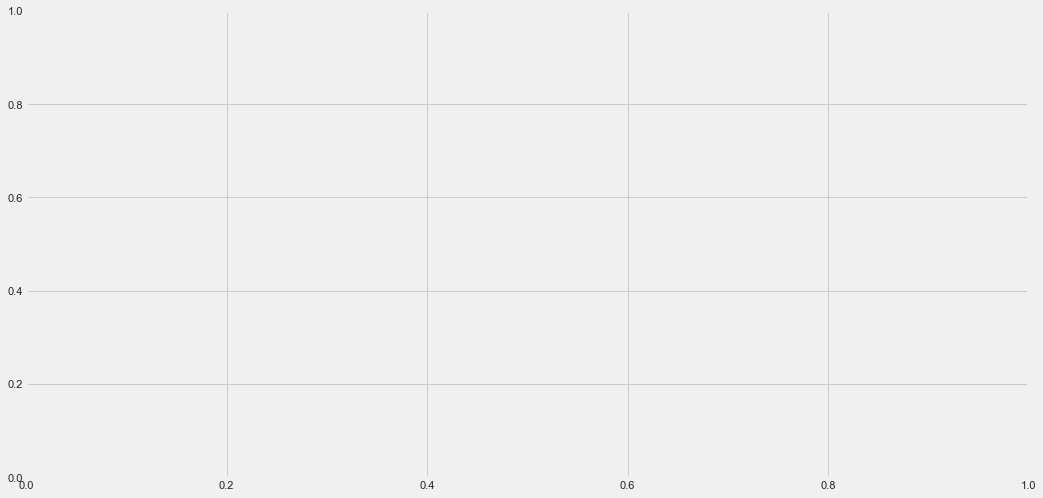